In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style("dark")

In [2]:
with open("2D-static-optimal.json") as json_data:
    optimal = json.load(json_data)
    json_data.close()

In [3]:
with open("2D-static-rest-5.json") as json_data:
    algos = json.load(json_data)
    json_data.close()

In [19]:
algo = algos[0]

print(f"Name: {algo['Algorithm']}. Success Rate: {algo['Success Rate']}")

Name: Adaptive A*: 5. Success Rate: 0.4


In [5]:

df_list = []

for entry in algos:
    algorithm_name = entry["Algorithm"]
    map_names = entry["Map Names"]
    results = entry["Results"]
    
    df = pd.DataFrame(results)
    
    df["map_name"] = map_names
    
    df.set_index("map_name", inplace=True)

    df.columns = [f"{algorithm_name}_{col}" for col in df.columns]
    
    df_list.append(df)

for entry in optimal:
    algorithm_name = entry["Algorithm"]
    map_names = entry["Map Names"]
    results = entry["Results"]
    
    df = pd.DataFrame(results)
    
    df["map_name"] = map_names
    
    df.set_index("map_name", inplace=True)

    df.columns = [f"{algorithm_name}_{col}" for col in df.columns]
    
    df_list.append(df)

final_df = pd.concat(df_list, axis=1)

final_df

,Adaptive A*: 5_path,Adaptive A*: 5_path_len,Adaptive A*: 5_energy,Adaptive A*: 5_compute_time,Adaptive A*: 5_traversal_time,Adaptive A*: 5_cpu_usage,Adaptive A*: 5_memory_used,Informed RRT*_path,Informed RRT*_path_len,Informed RRT*_energy,...,RRT-Edge_traversal_time,RRT-Edge_cpu_usage,RRT-Edge_memory_used,D* Lite_path,D* Lite_path_len,D* Lite_energy,D* Lite_compute_time,D* Lite_traversal_time,D* Lite_cpu_usage,D* Lite_memory_used
map_name,,,,,,,,,,,,,,,,,,,,,
house_18,None,NaN,NaN,None,None,"[100.0, 100.0, 100.0, 85.7, 75.9, 100.0, 100.0...",175934,None,NaN,NaN,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 75....",182505,"[[918, 408], [917, 407], [916, 406], [915, 405...",1052.597113,2.864101e+06,None,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99.8,...",31934238
block_70,"[[917, 506], [916, 507], [911, 512], [891, 516...",660.800752,89087.114722,None,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",158254,"[[917, 506], [912.0317417657118, 504.545893539...",841.410993,224667.750597,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",240161,"[[333, 381], [334, 382], [335, 383], [336, 384...",635.776695,1.915106e+06,None,0,"[0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0...",9622801
block_41,None,NaN,NaN,None,None,[28.6],39742,None,NaN,NaN,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",82049,None,NaN,NaN,None,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 83.2, 0.0, 0.0, 0.0,...",114507301
house_14,"[[736, 196], [739, 192], [719, 156], [812, 62]...",260.468916,19249.780756,None,None,"[100.0, 100.0, 100.0, 71.4]",53238,"[[736, 196], [737.1128016853717, 196.917234617...",271.495035,68143.844486,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",143350,"[[876, 11], [875, 12], [874, 13], [873, 14], [...",242.989899,6.082518e+05,None,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 99.8, 100.0, 0.0, 0....",1369382
house_75,None,NaN,NaN,None,None,"[88.9, 100.0, 100.0, 100.0, 94.4, 100.0, 100.0...",174766,None,NaN,NaN,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",236806,"[[842, 880], [841, 879], [840, 878], [839, 877...",1142.075252,3.281774e+06,None,0,"[0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",62252758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
house_76,None,NaN,NaN,None,None,"[76.3, 100.0, 100.0, 100.0, 100.0, 100.0, 12.5...",152119,None,NaN,NaN,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 85....",183612,"[[357, 605], [358, 604], [359, 603], [360, 602...",728.180808,2.029116e+06,None,0,"[0.0, 0.0, 99.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",19675833
house_47,"[[591, 644], [589, 643], [583, 645], [571, 649...",393.660814,47591.295141,None,None,"[53.8, 85.7, 100.0, 100.0, 100.0, 100.0, 100.0...",106239,None,NaN,NaN,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",172908,"[[245, 739], [246, 738], [247, 737], [248, 736...",385.350288,1.134938e+06,None,0,"[0.0, 99.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5517973
block_82,None,NaN,NaN,None,None,"[100.0, 100.0, 85.7, 50.0, 50.0, 100.0, 100.0,...",193047,None,NaN,NaN,...,0,"[100.0, 100.0, 100.0, 50.0, 85.7, 100.0, 100.0...",241641,None,NaN,NaN,None,0,[0.0],15685


In [25]:
path_len_srrt = final_df["MB-SRRT-Edge-5_path_len"]
path_len_rrt_edge = final_df["RRT-Edge_path_len"]
path_len_d_star = final_df["D* Lite_path_len"]


filtered_df = final_df.dropna(subset=["MB-SRRT-Edge-5_path_len", "RRT-Edge_path_len", "D* Lite_path_len"])
filtered_df

,Adaptive A*: 5_path,Adaptive A*: 5_path_len,Adaptive A*: 5_energy,Adaptive A*: 5_compute_time,Adaptive A*: 5_traversal_time,Adaptive A*: 5_cpu_usage,Adaptive A*: 5_memory_used,Informed RRT*_path,Informed RRT*_path_len,Informed RRT*_energy,...,RRT-Edge_traversal_time,RRT-Edge_cpu_usage,RRT-Edge_memory_used,D* Lite_path,D* Lite_path_len,D* Lite_energy,D* Lite_compute_time,D* Lite_traversal_time,D* Lite_cpu_usage,D* Lite_memory_used
map_name,,,,,,,,,,,,,,,,,,,,,
block_70,"[[917, 506], [916, 507], [911, 512], [891, 516...",660.800752,89087.114722,None,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",158254,"[[917, 506], [912.0317417657118, 504.545893539...",841.410993,224667.750597,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",240161,"[[333, 381], [334, 382], [335, 383], [336, 384...",635.776695,1.915106e+06,None,0,"[0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0...",9622801
house_14,"[[736, 196], [739, 192], [719, 156], [812, 62]...",260.468916,19249.780756,None,None,"[100.0, 100.0, 100.0, 71.4]",53238,"[[736, 196], [737.1128016853717, 196.917234617...",271.495035,68143.844486,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",143350,"[[876, 11], [875, 12], [874, 13], [873, 14], [...",242.989899,6.082518e+05,None,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 99.8, 100.0, 0.0, 0....",1369382
house_10,None,NaN,NaN,None,None,"[100.0, 52.4, 100.0, 25.0, 90.9, 100.0, 100.0,...",138566,None,NaN,NaN,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",161985,"[[870, 774], [869, 773], [868, 772], [867, 771...",515.234631,1.269816e+06,None,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99.9, 0.0, 0.0,...",6106882
block_113,"[[197, 164], [200, 169], [196, 180], [156, 219...",276.222975,23751.482063,None,None,"[100.0, 69.2]",50654,"[[197, 164], [44, 380]]",264.697941,13588.424701,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",166454,"[[44, 380], [45, 379], [46, 378], [47, 377], [...",279.374675,7.100643e+05,None,0,"[0.0, 0.0, 99.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1627602
block_21,None,NaN,NaN,None,None,"[100.0, 73.7, 86.7, 87.5, 90.9, 84.6, 100.0, 9...",143342,"[[149, 811], [155.8327017349584, 807.845411272...",879.469010,234925.336248,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",128174,"[[876, 680], [875, 681], [874, 682], [873, 683...",781.261977,2.383955e+06,None,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0...",16246685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
block_224,None,NaN,NaN,None,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",174651,None,NaN,NaN,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",209918,"[[786, 798], [785, 797], [784, 796], [783, 795...",940.543289,2.558929e+06,None,0,"[0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0...",20497445
block_136,"[[783, 46], [783, 47], [790, 55], [781, 94], [...",421.351442,58129.893596,None,None,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",135695,"[[783, 46], [783.563136922745, 48.291964231513...",468.662753,125624.974755,...,0,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 66....",194132,"[[919, 418], [918, 417], [917, 416], [916, 415...",428.333044,1.220688e+06,None,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0...",5944584
block_233,"[[321, 805], [321, 804], [322, 803], [323, 800...",461.027878,44963.802204,None,None,"[100.0, 100.0, 100.0, 100.0, 36.4]",59135,"[[321, 805], [319.27859047938443, 805.05875532...",558.159235,145169.993360,...,0,"[87.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100....",229705,"[[184, 408], [185, 409], [186, 410], [187, 411...",453.747258,1.302817e+06,None,0,"[99.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6942445


In [26]:
path_len_srrt = filtered_df["MB-SRRT-Edge-5_path_len"]
path_len_rrt_edge = filtered_df["RRT-Edge_path_len"]
path_len_d_star = filtered_df["D* Lite_path_len"]

In [27]:
path_len_srrt.mean()

621.2096436926023

In [28]:
path_len_rrt_edge.mean()

681.4461860819066

In [29]:
path_len_d_star.mean()

579.6927982686874

<ipython-input-33-814f35075829>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MB-SRRT_D* Lite_Diff'] = filtered_df["MB-SRRT-Edge-5_path_len"] - filtered_df["D* Lite_path_len"]
<ipython-input-33-814f35075829>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['RRT-Edge_D* Lite_Diff'] = filtered_df["RRT-Edge_path_len"] - filtered_df["D* Lite_path_len"]


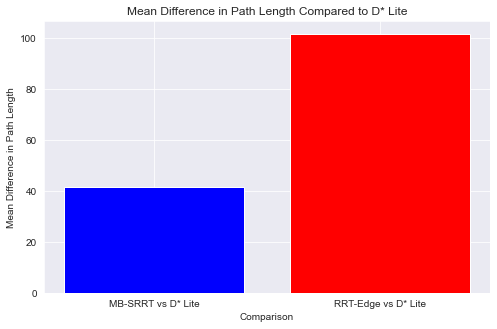

In [33]:
# Calculate the differences
filtered_df['MB-SRRT_D* Lite_Diff'] = filtered_df["MB-SRRT-Edge-5_path_len"] - filtered_df["D* Lite_path_len"]
filtered_df['RRT-Edge_D* Lite_Diff'] = filtered_df["RRT-Edge_path_len"] - filtered_df["D* Lite_path_len"]

# Calculate mean differences
mean_diffs = {
    'SRRT-Edge vs D* Lite': filtered_df['MB-SRRT_D* Lite_Diff'].mean(),
    'RRT-Edge vs D* Lite': filtered_df['RRT-Edge_D* Lite_Diff'].mean()
}

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(mean_diffs.keys(), mean_diffs.values(), color=['blue', 'red'])
plt.xlabel("Comparison")
plt.ylabel("Mean Difference in Path Length")
plt.title("Mean Difference in Path Length Compared to D* Lite")
plt.grid(True)

plt.show()